In [1]:
import nltk
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

#### .isalpha()
This method returns true if all characters in the string are alphabetic and there is at least one character, false otherwise.

In [2]:
# note the use of words() to load tokens
whitmanTokens = list(nltk.corpus.gutenberg.words('whitman-leaves.txt'))
# filter out non-words
whitmanWords = [word for word in whitmanTokens if word[0].isalpha()]
print whitmanWords[:10]

[u'Leaves', u'of', u'Grass', u'by', u'Walt', u'Whitman', u'Come', u'said', u'my', u'soul']


#### .collocations()
There's actually a very easy and convenient way to look for the top bigrams in an NLTK text using the collocations() function </a> and specifying the number of top frequency phrases to return.

In [3]:
whitmanText = nltk.Text (whitmanWords)
# 20 top bigrams separated by semi-colon
whitmanText.collocations(20)

young men; open air; Walt Whitman; young man; New World; every one;
every thing; live oak; Good bye; whole earth; Thou knowest; thousand
years; Old Age; mocking bird; shapes arise; old man; little child;
steam whistle; centuries hence; old age


### NLTK N-Grams

In [17]:
# create four-grams
whitman4grams = list(nltk.ngrams(whitmanWords,4))
print whitman4grams[0] # a list of 4 grams words
# determine frequency of four-grams
whitman4gramsFreq = nltk.FreqDist(whitman4grams)
for words, count in whitman4gramsFreq.most_common(15):
    print (count, ' '.join(list(words)))

(u'Leaves', u'of', u'Grass', u'by')
(14, u'it shall be you')
(11, u'of the earth and')
(11, u'I do not know')
(11, u'as much as the')
(10, u'The shape of the')
(10, u'in the open air')
(10, u'of men and women')
(10, u'I do not doubt')
(10, u'just as much as')
(8, u'in the midst of')
(8, u'of the earth I')
(8, u'you whoever you are')
(7, u'do not know what')
(7, u'the sound of the')
(7, u'know what it is')


### Distribution of Phrase

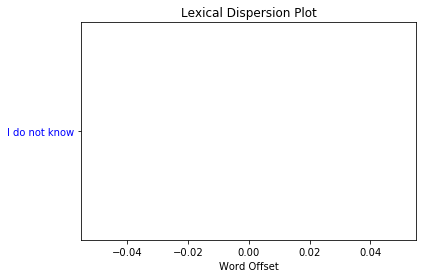

In [23]:
whitmanText.dispersion_plot(["I do not know"])
# won't work since phrases aren't in the emmaText tokens

However, we can create a new text from our ngrams and then ask for a dispersion plot. 

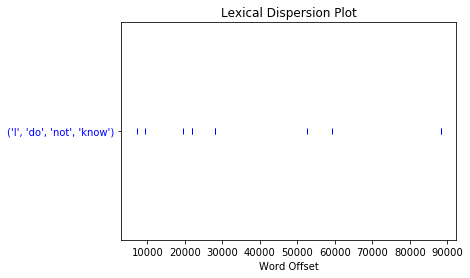

In [24]:
whitman4gramsText = nltk.Text(whitman4grams)
whitman4gramsText.dispersion_plot([("I","do","not","know")])

### Longest Repeating Phrases

In [10]:
ngramsFreqs = [] # keep track of last set of repeating phrases
# create a range from 2 to the length of the text (even if we don't get that high)
for length in range (2,len(whitmanWords)):
    ngrams = list(nltk.ngrams(whitmanWords, length))
    freqs = nltk.FreqDist(ngrams)
    
    # filter out frequencies that don't repeat
    freqs = [(ngram, count) for ngram, count in freqs.items() if count > 1]
    if len(freqs) > 0: # we have at least one repeating phrase
        ngramsFreqs = freqs # new set of frequencies
    else: # if we've filtered out all frequencies then break out of the loop
        break

for ngram, count in ngramsFreqs:
    print('ngram of', len(ngram), ' words occuring ', count, ' times:', ' '.join(list(ngram)))

('ngram of', 33, ' words occuring ', 2, ' times:', u'from top to toe I sing Not physiognomy alone nor brain alone is worthy for the Muse I say the Form complete is worthier far The Female equally with the Male I sing')


### Segmenting Texts
We can segment our tokens or n-grams </a> in various ways, but one convenient way is to use a library called NumPy that is helpful for working with arrays </a> (and graphing array-backed data). Let's see it in action with a simplified example where we're going to create a list of numbers from 0 to 9 (10 elements) and then create 5 equal bins in which to place the items.

In [11]:
numbers = list(range(0,9)) # create a range from 0 to 9 and convert the range to a list
numbers

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [12]:
import numpy as np
numberBins = np.array_split(numbers, 5) # divide our numbers into 5 equal bins
print("number of bins:", len(numberBins))
numberBins

('number of bins:', 5)


[array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8])]

We can do something similar with our whitman4gramsTokens, dividing the list into 10 each parts.

In [16]:

whitman4gramsTokens = [" ".join(gram) for gram in whitman4grams]
print whitman4gramsTokens[0]
whitman4gramsSegments = np.array_split(whitman4gramsTokens, 10)
[len(segment) for segment in whitman4gramsSegments] # how many ngrams in each bin?

Leaves of Grass by


[12628, 12628, 12628, 12627, 12627, 12627, 12627, 12627, 12627, 12627]

Now, instead of counting the number of tokens, we'll count the number of occurrences of our search term "it shall be you".

In [26]:
iDoNotKnowCounts = []
for seg in whitman4gramsSegments:
        iDoNotKnowCounts.append(list(seg).count('I do not know'))

itShallBeYouCounts # counts per segment

[2, 3, 2, 0, 2, 0, 2, 0, 0, 0]


And now a simple plot of these counts (we're adding a legend to make it easier to understand).

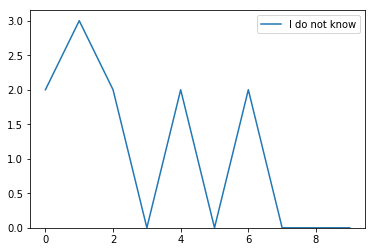

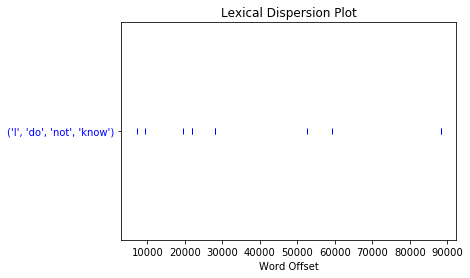

In [27]:
import matplotlib.pyplot as plt
line = plt.plot(iDoNotKnowCounts, label="I do not know")
plt.ylim(0) # make sure to set y axis to start at zero
plt.legend(handles=line) # we're going to add a legend
plt.show() # make sure to flush out the line chart
whitman4gramsText.dispersion_plot([("I","do","not","know")]) # for comparison sake

Line graphs can be a bit easier to read for multiple values though. Let's construct a graph that compares "I do not know" and "of the earth and".

[<matplotlib.lines.Line2D object at 0x115053550>, <matplotlib.lines.Line2D object at 0x115053510>]


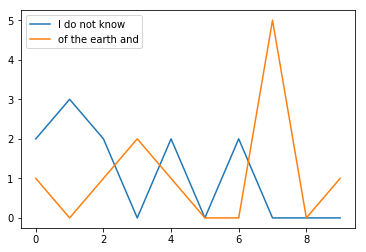

In [31]:
searches = ["I do not know", "of the earth and"]
lines = []
for search in searches:
    line, = plt.plot([list(segment).count(search) for segment in whitman4gramsSegments], label=search)
    lines.append(line)
print lines
plt.legend(handles=lines)
plt.show()

### Correlations

A question we might have about the graph above is to what extent values in the two lines correlate. In other words, if one line rises, does the other have a tendency to rise, or is it the opposite, or is there no real correlation (synchronized variation) between the two.

Once again we can use NumPy to help us measure correlation using corrcoef(). Let's first see it in action with a couple of simple example datasets.

In [33]:
iDoNotKnowCounts = [list(segment).count("I do not know") for segment in whitman4gramsSegments]
ofTheEarthAndCounts = [list(segment).count("of the earth and") for segment in whitman4gramsSegments]
print(iDoNotKnowCounts)
print(ofTheEarthAndCounts)

[2, 3, 2, 0, 2, 0, 2, 0, 0, 0]
[1, 0, 1, 2, 1, 0, 0, 5, 0, 1]


In [34]:
np.corrcoef(iDoNotKnowCounts, ofTheEarthAndCounts)[0,1]

-0.37150258224395127

A weak inverse correlation.

Let's see if we can find one of our top frequency four-grams with a stronger correlation.

In [36]:
whitman4gramsMostFreq = [" ".join(words) for words, count in whitman4gramsFreq.most_common(15)]
print (whitman4gramsMostFreq)

[u'it shall be you', u'of the earth and', u'I do not know', u'as much as the', u'The shape of the', u'in the open air', u'of men and women', u'I do not doubt', u'just as much as', u'in the midst of', u'of the earth I', u'you whoever you are', u'do not know what', u'the sound of the', u'know what it is']


In [37]:
# build a dictionary of counts for each search item
whitman4gramsSegmentsCounts = {}
for search in whitman4gramsMostFreq:
    whitman4gramsSegmentsCounts[search] = [list(segment).count(search) for segment in whitman4gramsSegments]

In [40]:
# build a dictionary of correlaiton values for "I do not know"
iDoNotKnowCorrelations = {}
for ngram, counts in whitman4gramsSegmentsCounts.items():
    iDoNotKnowCorrelations[ngram] = np.corrcoef(whitman4gramsSegmentsCounts["I do not know"], counts)[0,1]

[(u'I do not know', 0.99999999999999978), (u'do not know what', 0.93566055193419362), (u'you whoever you are', 0.67033207807355677), (u'in the midst of', 0.64699663922063044), (u'in the open air', 0.5906244232186183), (u'as much as the', 0.49769250596919062), (u'just as much as', 0.48224282217041209), (u'it shall be you', 0.2641352718976871), (u'know what it is', 0.24976918100516846), (u'of the earth I', 0.1917027079172238), (u'the sound of the', 0.17875432925883694), (u'of men and women', 0.16074760739013735), (u'I do not doubt', -0.29531221160930909), (u'The shape of the', -0.32283199898606196), (u'of the earth and', -0.37150258224395127)]


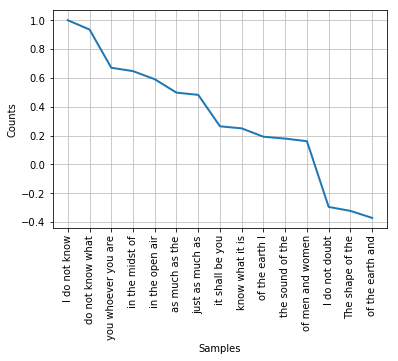

In [41]:
iDoNotKnowCorrelationFreqs = nltk.FreqDist(iDoNotKnowCorrelations)
print iDoNotKnowCorrelationFreqs.most_common()
iDoNotKnowCorrelationFreqs.plot()